# COVID-19を予測してみましょう

まず、データを読み込み、内容を確認

<BarContainer object of 342 artists>

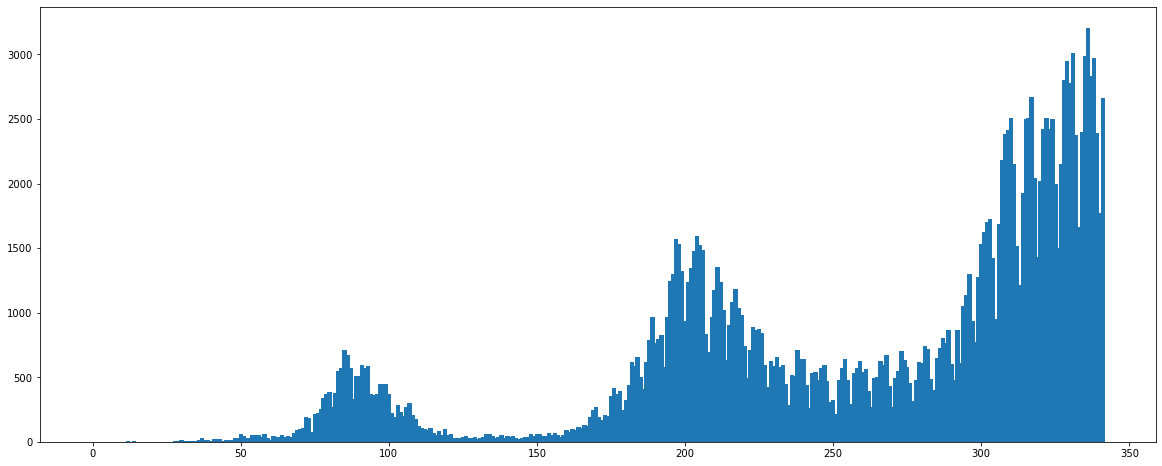

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# データセットから陽性の数のみを読み込む
data_y = np.loadtxt("data/pcr_positive_daily.csv", skiprows=1, delimiter=',', usecols=(1), encoding="utf-8_sig")

# 日付を使えないが、1日毎のデータがあるので、日数を取れる
num_days = len(data_y)
data_x = list(range(num_days))

# 可視化
plt.figure(figsize=(20,8)) 
plt.bar(data_x, data_y, width=1.5)

## AIで処理できるため、正規化などが必要

注意：シークエンスなので、あるデータサンプルから過去を数サンプルを含めて、入力になる

例えば：
```
data_y = [10, 5, 7, 9, 14, 2, 1, 5, 12]
timesteps = 4
```
の場合は：
```
入力(x) = [10, 5, 7, 9], [5, 7, 9, 14], [7, 9, 14, 2]
出力(y) = 14,            2            , 1
```
のような形になる

In [7]:
# データセットを準備。
# ここで「timesteps」は過去データはどれぐらいみるのかという意味
def prepare_dataset(data_y, timesteps):
    
    prep_x = []
    prep_y = []   
    
    for i in range(len(data_x) - timesteps):
        x = data_y[i:i+timesteps]
        y = data_y[i+timesteps]
        prep_x.append(x)
        prep_y.append(y)

    return np.array(prep_x), np.array(prep_y)

In [8]:
timesteps = 5
prep_x, prep_y = prepare_dataset(data_y, timesteps)

In [10]:
print(prep_x[10:20], prep_y[10:20])

[[1. 0. 3. 1. 3.]
 [0. 3. 1. 3. 1.]
 [3. 1. 3. 1. 0.]
 [1. 3. 1. 0. 0.]
 [3. 1. 0. 0. 0.]
 [1. 0. 0. 0. 2.]
 [0. 0. 0. 2. 2.]
 [0. 0. 2. 2. 0.]
 [0. 2. 2. 0. 0.]
 [2. 2. 0. 0. 0.]] [1. 0. 0. 0. 2. 2. 0. 0. 0. 0.]
